In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

In [3]:
realtor_data = Path('realtor_data.csv') 
realtor_data_df = pd.read_csv(realtor_data)

realtor_data_df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [4]:
ct_df = realtor_data_df[realtor_data_df['state'] == 'Connecticut']
ct_df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
27820,for_sale,225000.0,3.0,1.0,3.93,"326 River Rd, Willington, CT, 06279",326 River Rd,Willington,Connecticut,6279.0,1572.0,NaN
27821,for_sale,579900.0,4.0,3.0,2.34,"32 Heather Ln, Coventry, CT, 06238",32 Heather Ln,Coventry,Connecticut,6238.0,3320.0,6/1/2021
27823,for_sale,65000.0,1.0,1.0,NaN,"63 Schofield Rd Apt 34, Willington, CT, 06279",63 Schofield Rd Apt 34,Willington,Connecticut,6279.0,680.0,8/16/2019
27826,for_sale,215000.0,2.0,1.0,0.91,"353 Rye St, East Windsor, CT, 06016",353 Rye St,East Windsor,Connecticut,6016.0,960.0,6/6/2012
27828,for_sale,144900.0,2.0,1.0,0.36,"24 Worcester Rd, Vernon, CT, 06066",24 Worcester Rd,Vernon,Connecticut,6066.0,860.0,9/2/2016


In [5]:
ct_df.columns

Index(['status', 'price', 'bed', 'bath', 'acre_lot', 'full_address', 'street',
       'city', 'state', 'zip_code', 'house_size', 'sold_date'],
      dtype='object')

In [6]:
q1_ct_df = ct_df[['price', 'bed', 'bath', 'acre_lot', 'house_size', 'state', 'city']]
q1_ct_df.head()

,price,bed,bath,acre_lot,house_size,state,city
27820,225000.0,3.0,1.0,3.93,1572.0,Connecticut,Willington
27821,579900.0,4.0,3.0,2.34,3320.0,Connecticut,Coventry
27823,65000.0,1.0,1.0,NaN,680.0,Connecticut,Willington
27826,215000.0,2.0,1.0,0.91,960.0,Connecticut,East Windsor
27828,144900.0,2.0,1.0,0.36,860.0,Connecticut,Vernon


In [7]:
# Drop null values
q1_ct_df = q1_ct_df.dropna()
q1_ct_df.head()

,price,bed,bath,acre_lot,house_size,state,city
27820,225000.0,3.0,1.0,3.93,1572.0,Connecticut,Willington
27821,579900.0,4.0,3.0,2.34,3320.0,Connecticut,Coventry
27826,215000.0,2.0,1.0,0.91,960.0,Connecticut,East Windsor
27828,144900.0,2.0,1.0,0.36,860.0,Connecticut,Vernon
27829,174900.0,3.0,2.0,0.19,1280.0,Connecticut,Manchester


In [8]:
# Funtion that identifies lower quartile, upper quartile, IQR, outliers, and number of outliers
# The data frame that q1_df needs to be defined before the function is run
# For each state, set q1_df to be a copy of the state DataFrame (i.e. ny_df)
q1_df = ct_df

# variable is the column title
def find_outliers(variable):
    
    # Creates a list/series from the single column that comes from the variable
    feature = q1_df[variable]
    
    # Define quartile, and set values for lower q, upper q, and IQR
    quartiles = feature.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    
    # Creates an empty list for outliers
    outliers = []
    
    # Loops through the data to identify any values that are outliers and adds them to the list
    for x in feature:
        if (x > (upperq + 1.5*iqr)) | (x < (lowerq - 1.5*iqr)):
            outliers.append(x)

    # Prints an output that gives the data we're looking for
    print(f'{variable.title()}')
    print(f'\tLower Quartile: {lowerq}')
    print(f'\tUpper Quartile: {upperq}')
    print(f'\tOutliers are less than {lowerq - 1.5*iqr}, and greater than {upperq + 1.5*iqr}.')
    print(f'\tThere are {len(outliers)} outliers.')


In [9]:
# Identify Price outliers
find_outliers('price')

Price
	Lower Quartile: 239000.0
	Upper Quartile: 479900.0
	Outliers are less than -122350.0, and greater than 841250.0.
	There are 5855 outliers.


In [10]:
# Identify Bedroom outliers
find_outliers('bed')

Bed
	Lower Quartile: 3.0
	Upper Quartile: 4.0
	Outliers are less than 1.5, and greater than 5.5.
	There are 6757 outliers.


In [11]:
# Identify Bathroom outliers
find_outliers('bath')

Bath
	Lower Quartile: 2.0
	Upper Quartile: 3.0
	Outliers are less than 0.5, and greater than 4.5.
	There are 4337 outliers.


In [12]:
# Identify Acerage outliers
find_outliers('acre_lot')

Acre_Lot
	Lower Quartile: 0.21
	Upper Quartile: 1.12
	Outliers are less than -1.1550000000000002, and greater than 2.4850000000000003.
	There are 7671 outliers.


In [13]:
# Identify Square Footage outliers
find_outliers('house_size')

House_Size
	Lower Quartile: 1306.0
	Upper Quartile: 2591.0
	Outliers are less than -621.5, and greater than 4518.5.
	There are 2902 outliers.


In [15]:
q1_ct_df = q1_ct_df[q1_ct_df['bed'] < 5.5]
q1_ct_df = q1_ct_df[q1_ct_df['bath'] < 4.5]
q1_ct_df = q1_ct_df[q1_ct_df['acre_lot'] < 2.4850000000000003]
q1_ct_df = q1_ct_df[q1_ct_df['house_size'] < 4518.5]
q1_ct_df


,price,bed,bath,acre_lot,house_size,state,city
27821,579900.0,4.0,3.0,2.34,3320.0,Connecticut,Coventry
27826,215000.0,2.0,1.0,0.91,960.0,Connecticut,East Windsor
27828,144900.0,2.0,1.0,0.36,860.0,Connecticut,Vernon
27829,174900.0,3.0,2.0,0.19,1280.0,Connecticut,Manchester
27830,289900.0,4.0,2.0,0.38,1617.0,Connecticut,East Windsor
...,...,...,...,...,...,...,...
464226,725000.0,4.0,2.0,1.00,1761.0,Connecticut,Stamford
464227,1199000.0,4.0,4.0,1.01,3500.0,Connecticut,Stamford
464229,1199000.0,4.0,4.0,1.05,4370.0,Connecticut,Stamford
464230,1095000.0,5.0,4.0,1.00,3983.0,Connecticut,Stamford


In [16]:
# Function that will plot linear regression for differnt housing variables
housing_corr = {}

# x and y axis will be columns from your DataFrames
def house_plot(x_axis, y_axis):

    # Plots a scatter plot
    plt.scatter(x=x_axis, y=y_axis, color='blue')

    # Calculates the correlation or r-value between the two variables
    corr = round(st.pearsonr(x_axis, y_axis)[0],2)

    # Calculates the linear regression
    (slope, intercept, rvalue, pvalue, tderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept

    # writes the linear regresion equation to by displayed on graph
    lin_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
    
    # Plots linear Regression line and annotates graph
    plt.plot(x_axis,regress_values, color='red')
    plt.annotate(lin_eq,((x_axis.max() - .5),100000))
    plt.tight_layout()
    plt.show()
    
    # Adds the axis name and r-value to the dictionary defined above
    housing_corr[x_axis.name]= corr
    
    print(f'The r-value is: {rvalue}')

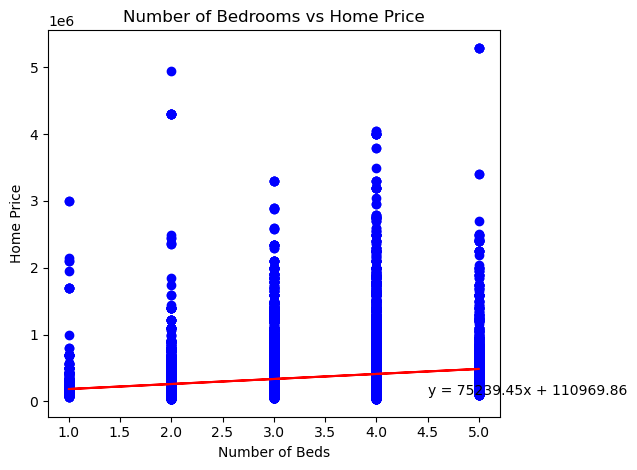

The r-value is: 0.2266743361270431


In [17]:
plt.xlabel('Number of Beds')
plt.ylabel('Home Price')
plt.title('Number of Bedrooms vs Home Price')
house_plot(q1_ct_df['bed'],q1_ct_df['price'])

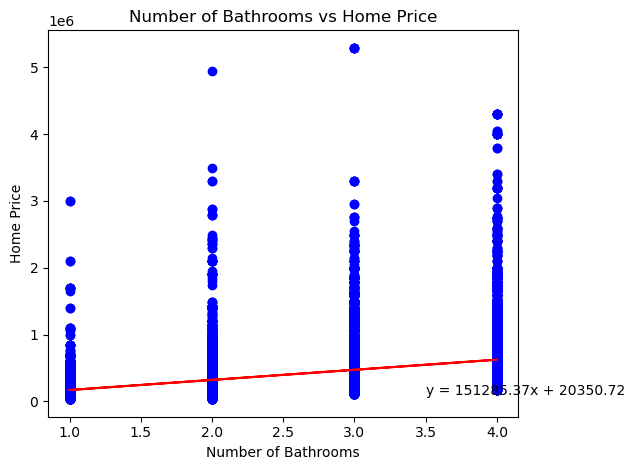

The r-value is: 0.4940370211995968


In [18]:
plt.xlabel('Number of Bathrooms')
plt.ylabel('Home Price')
plt.title('Number of Bathrooms vs Home Price')
house_plot(q1_ct_df['bath'],q1_ct_df['price'])

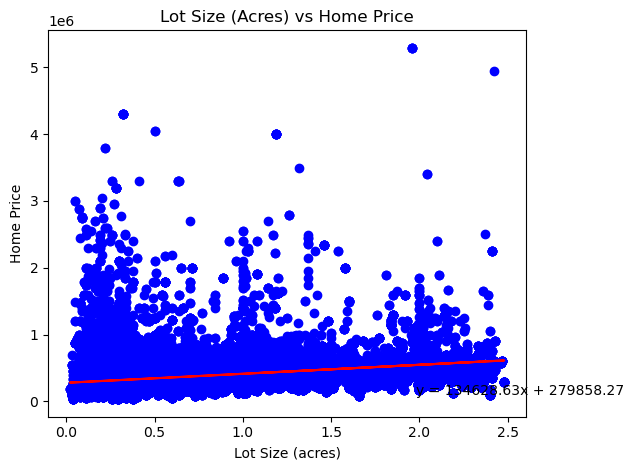

The r-value is: 0.280850509158051


In [19]:
plt.xlabel('Lot Size (acres)')
plt.ylabel('Home Price')
plt.title('Lot Size (Acres) vs Home Price')
house_plot(q1_ct_df['acre_lot'],q1_ct_df['price'])

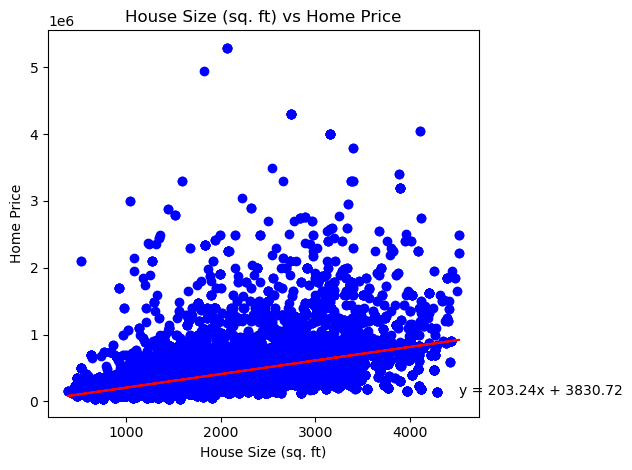

The r-value is: 0.5401917977944849


In [20]:
plt.xlabel('House Size (sq. ft)')
plt.ylabel('Home Price')
plt.title('House Size (sq. ft) vs Home Price')
house_plot(q1_ct_df['house_size'],q1_ct_df['price'])

In [21]:
for key in housing_corr:
    print(f'The r-value for {key} is {housing_corr[key]}')

The r-value for bed is 0.23
The r-value for bath is 0.49
The r-value for acre_lot is 0.28
The r-value for house_size is 0.54


In [22]:
housing_corr


{'bed': 0.23, 'bath': 0.49, 'acre_lot': 0.28, 'house_size': 0.54}